In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os import listdir
import matplotlib.lines as mlines

In [107]:
'''
Perform PCA to represent two conditions in 3d subspaces and find their best-fitting planes
'''

subject = 'Tir'
if 'Tir' in subject:
    trial_num = 45
else:
    trial_num = 10
area = 'PFC'

condition1 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_condition_data/{subject}/{subject}_s1_{area}_update_feature_label.npz')['feature']
condition2 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_condition_data/{subject}/{subject}_s2_{area}_update_feature_label.npz')['feature']

In [108]:
data_t = np.load('/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_input/061311Tir_spk_rate.npz')
tps = np.mean(data_t['rate_bins'], axis=1)

In [109]:
def pca(start_t, end_t, popu_X):
    t = np.argwhere((tps>=start_t) & (tps<=end_t)).flatten()
    popu_X_t = np.mean(popu_X[:,:,t], axis=-1)
    cov = np.cov(popu_X_t.T)
    (U, S, VT) = np.linalg.svd(cov, full_matrices=False)
    print(np.cumsum(S)/np.sum(S))
    Z_t = U[:,:3].T@popu_X_t.T
    return Z_t
    
    
    

In [110]:
def t_to_idx(t):
    return int((t-(-2))/0.05)

def pca_t(t, popu_X):
    popu_X_t = popu_X[:,:,t_to_idx(t)]
    cov = np.cov(popu_X_t.T)
    (U, S, VT) = np.linalg.svd(cov, full_matrices=False)
    print(np.cumsum(S)/np.sum(S))
    Z_t = U[:,:3].T@popu_X_t.T
    return Z_t

In [111]:
def pca_2d(Z):
    Z_mean = np.expand_dims(np.mean(Z, axis=1), axis=1)
    Y = Z - Z_mean
    cov = np.cov(Y)
    (U, S, VT) = np.linalg.svd(cov, full_matrices=False)
    print(np.cumsum(S)/np.sum(S))
    y = U[:,:2].T@Y
    return y, U
    

In [121]:
popu_X = []
for i in range(0, condition1.shape[0], trial_num):
    popu_X.append(np.expand_dims(np.mean(condition1[i:i+trial_num], axis=0), axis=0))

for i in range(0, condition2.shape[0], trial_num):
    popu_X.append(np.expand_dims(np.mean(condition2[i:i+trial_num], axis=0), axis=0))

popu_X = np.concatenate(popu_X, axis=0)
popu_X_mean = np.expand_dims(np.mean(popu_X, axis=0), axis=0)
popu_X = popu_X - popu_X_mean

t = 3
Z = pca_t(t, popu_X)

[0.58998887 0.77238547 0.84345824 0.89802646 0.94629835 0.98384841
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1. 

In [122]:
_, U1 = pca_2d(Z[:,:4])
_, U2 = pca_2d(Z[:,4:])

[0.61076588 0.93003213 1.        ]
[0.72982358 0.92446879 1.        ]


In [123]:
import math
normal1 = U1[:,2]
normal2 = U2[:,2]
cos = np.dot(normal1, normal2)/(np.linalg.norm(normal1)*np.linalg.norm(normal2))
print(math.degrees(math.acos(np.abs(cos))))

28.437026494202446


-1.4518572160271845
1.2233073204018088


/tmp/ipykernel_16501/3543980020.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection='3d')


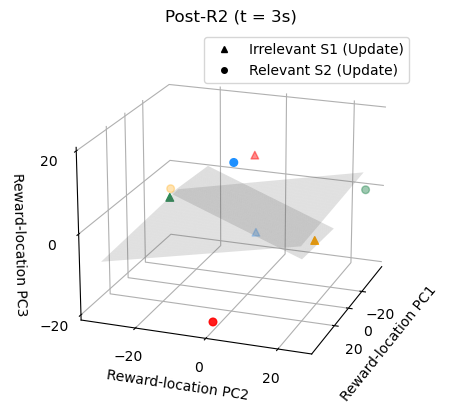

In [130]:
def surface_param(U, Z):
    normal = U[:,2]
    centroid = np.mean(Z, axis=-1)
    d = -centroid.dot(normal)
    print(d)
    xx, yy = np.meshgrid(np.arange(np.min(Z[0]), np.max(Z[0])), np.arange(np.min(Z[1]), np.max(Z[1])))
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    return xx, yy, z, centroid

xx1, yy1, z1, c1 = surface_param(U1, Z[:,:4])
xx2, yy2, z2, c2 = surface_param(U2, Z[:,4:])

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx1, yy1, z1, alpha=0.2, color='grey')
plt3d.scatter(Z[0, :4], Z[1, :4], Z[2, :4], color=['red', 'orange', 'seagreen', 'dodgerblue'], s=30, marker='^')
plt3d.plot_surface(xx2, yy2, z2, alpha=0.2, color='grey')
plt3d.scatter(Z[0, 4:], Z[1, 4:], Z[2, 4:], color=['red', 'orange', 'seagreen', 'dodgerblue'], s=30, marker='o')

triangle = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=4, label='Irrelevant S1 (Update)')
dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=4, label='Relevant S2 (Update)')

plt3d.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt3d.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt3d.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt3d.set_xticks([-20,0,20])
plt3d.set_yticks([-20,0,20])
plt3d.set_zticks([-20,0,20])
plt3d.set_xlabel('Reward-location PC1')
plt3d.set_ylabel('Reward-location PC2')
plt3d.set_zlabel('Reward-location PC3')
plt3d.set_title(f'Post-R2 (t = {t}s)')
plt3d.view_init(20, 20) # Ignore this. Just for angle of viewing

plt3d.legend(handles=[triangle, dot])
plt.show()